# <center><b>GCD Capstone Project<b></center>

---
# **Table of Contents**
---

**1.** [**Project Description**](#Section1)<br>
  - **1.1** [**Consulting Goals**](#Section11)
  - **1.2** [**Data Description (as provided)**](#Section12)
  - **1.3** [**???**](#Section13)
  - **1.4** [**???**](#Section14)
  - **1.5** [**???**](#Section15)

**2.** [**Setting up the work environment**](#Section2)<br>
  - **2.1** [**Installing Libraries**](#Section21)
  - **2.2** [**Importing Libraries**](#Section22)

**3.** [**Data Acquisition & Description**](#Section3)<br>
  - **3.1** [**Data Acquisition**](#Section31)
  - **3.2** [**Data Description (self-guided)**](#Section32)

**4.** [**Data Pre-processing**](#Section5)<br>
  - **4.1** [**Pre-Profiling Report**](#Section51)<br>

**5.** [**Exploratory Data Analysis**](#Section6)<br>
**6.** [**Post Data Processing & Feature Selection**](#Section7)<br>
  - **7.1** [**Feature Encoding**](#Section71)<br>
  - **7.2** [**Feature Selection**](#Section72)<br>
  - **7.3** [**Data Preparation**](#Section73)<br>

**7.** [**Model Development & Evaluation**](#Section8)<br>
**8.** [**Conclusion**](#Section9)<br>

---
<a name = Section1></a>
# **1. Project Description**
---



**Your client for this project is the HR Department at a software company.**
- They want to try a new initiative to retain employees.
- The idea is to use data to predict whether an employee is likely to leave.
- Once these employees are identified, HR can be more proactive in reaching out to them before it's too late.
- They only want to deal with the data that is related to permanent employees.

**Current Practice**

Once an employee leaves, he or she is taken an interview with the name “exit interview” and shares reasons for leaving. The HR Department then tries and learns insights from the interview and makes changes accordingly.

**This suffers from the following problems:**
- This approach is that it's too haphazard. The quality of insight gained from an interview depends heavily on the skill of the interviewer.
- The second problem is these insights can't be aggregated and interlaced across all employees who have left.
- The third is that it is too late by the time the proposed policy changes take effect.


The HR department has hired you as data science consultants. They want to supplement their exit interviews with a more proactive approach.



<a name = Section11></a>
## **1.1 Consulting Goals**

**Your Role**
- You are given datasets of past employees and their status (still employed or already left).
- Your task is to build a classification model using the datasets.
- Because there was no machine learning model for this problem in the company, you don’t have quantifiable win condition. You need to build the best possible model.


**Problem Specifics**
- Deliverable: **Predict whether an employee will stay or leave.**
- Machine learning task: **Classification**
- Target variable: **Status (Employed/Left)**
- Win condition: **N/A (best possible model)**


</br>


<a name = Section12></a>
## **1.2 Data Description (as provided)**

The Business Intelligence Analysts of the Company provided you three datasets that contain information about past employees and their status (still employed or already left).

1. **department_data**

    This dataset contains information about each department. The schema of the dataset is as follows:
    * **dept_id** – Unique Department Code
    * **dept_name** – Name of the Department
    * **dept_head** – Name of the Head of the Department
</br></br>
2. **employee_details_data**

    This dataset consists of Employee ID, their Age, Gender and Marital Status. The schema of this dataset is as follows:
    * **employee_id** – Unique ID Number for each employee
    * **age** – Age of the employee
    * **gender** – Gender of the employee
    * **marital_status** – Marital Status of the employee
</br></br>
3. **employee_data**

    This dataset consists of each employee’s Administrative Information, Workload Information, Mutual Evaluation Information and Status.

    **Target variable**
      * **status** – Current employment status (Employed / Left)

    **Administrative information**
      * **department** – Department to which the employees belong(ed) to
      * **salary** – Salary level with respect to rest of their department
      * **tenure** – Number of years at the company
      * **recently_promoted** – Was the employee promoted in the last 3 years?
      * **employee_id** – Unique ID Number for each employee

    **Workload information**
      * **n_projects** – Number of projects employee has worked on
      * **avg_monthly_hrs** – Average number of hours worked per month

    **Mutual evaluation information**
      * **satisfaction** – Score for employee’s satisfaction with the company (higher is better)
      * **last_evaluation** – Score for most recent evaluation of employee (higher is better)
      * **filed_complaint** – Has the employee filed a formal complaint in the last 3 years?


</br></br>


---
<a name = Section2></a>
# **2. Setting up the work environment**
---

<a name = Section21></a>
### **2.1 Installing and Upgrading Libraries**

Any additional packages required specifically for this project that aren't present in the standard environment (managed externally via anaconda) are installed here

In [1]:
# pip install something

<a name = Section22></a>
### **2.2 Importing Libraries**

In [50]:
import numpy as np                                                      # Importing package numpy (For Numerical Python)
import pandas as pd                                                     # Importing for panel data analysis
import mysql.connector as sql                                           # Importing for collecting data from mysql server
import matplotlib.pyplot as plt                                         # Importing for low-level plotting needs
import seaborn as sns                                                   # Importing for high-level plotting needs
from tqdm.notebook import tqdm                                          # Importing for loop-time management


from matplotlib import rcParams                                         # Importing for large-scale fine control of plots
rcParams['figure.figsize'] = 24,12


<a name = Section23></a>
### **2.2 Helper functions**

These are used to make the workflow more streamlined and legible


In [3]:
def line_break():
    print('-------------------------------------------------------------------------------------')

---
<a name = Section3></a>
# **3. Data Acquisition and Description**
---

<a name = Section31></a>
### **3.1 Data Acquisition**

In [4]:
server = sql.connect(host='cpanel.insaid.co', database='Capstone2', user='student', password='student')

df1 = pd.read_sql('SELECT * FROM department_data', con=server)
df2 = pd.read_sql('SELECT * FROM employee_details_data', con=server)
df3 = pd.read_sql('SELECT * FROM employee_data', con=server)

<a name = Section32></a>
### **3.2 Data Description (self-guided)**

In [5]:
print(df1.info())
df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dept_id    11 non-null     object
 1   dept_name  11 non-null     object
 2   dept_head  11 non-null     object
dtypes: object(3)
memory usage: 392.0+ bytes
None


,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray
5,D00-FN,Finance,Aanchal J
6,D00-PR,Procurement,Louie Viles
7,D00-AD,Admin,Evelyn Tolson
8,D00-MN,Management,Ellie Trafton
9,D00-MT,Marketing,Reuben Swann


In [6]:
print(df2.info())
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB
None


,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


In [7]:
print(df2['age'].min(),",",df2['age'].max())
line_break()
#print(df2['age'].value_counts())
#df2['gender'].value_counts()
print(df2['marital_status'].value_counts())
line_break()
print(df2['employee_id'].value_counts())

22 , 57
-------------------------------------------------------------------------------------
Unmarried    7283
Married      6962
Name: marital_status, dtype: int64
-------------------------------------------------------------------------------------
113558    1
105958    1
102997    1
110185    1
118385    1
         ..
107064    1
115991    1
119377    1
109889    1
118849    1
Name: employee_id, Length: 14245, dtype: int64


In [8]:
print(df3.info())
line_break()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB
None
-------------------------------------------------------------------------------------


,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707


In [14]:
print(df3['department'].value_counts())
line_break()
print(df3['filed_complaint'].value_counts())
line_break()
print(df3['recently_promoted'].value_counts())
line_break()
print(df3['tenure'].value_counts())
line_break()
print(df3['employee_id'].value_counts())
line_break()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df3[df3.duplicated(keep = False,subset = ['employee_id'])].sort_values(by=['employee_id']))



D00-SS     3905
D00-ENG    2575
D00-SP     2113
D00-IT     1364
D00-PD      855
D00-MT      815
D00-FN      725
D00-MN      593
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64
-------------------------------------------------------------------------------------
1.0    2046
Name: filed_complaint, dtype: int64
-------------------------------------------------------------------------------------
1.0    297
Name: recently_promoted, dtype: int64
-------------------------------------------------------------------------------------
3.0     6018
2.0     3023
4.0     2394
5.0     1369
6.0      660
10.0     201
7.0      180
8.0      155
Name: tenure, dtype: int64
-------------------------------------------------------------------------------------
0         5
109804    2
108265    2
109085    2
115325    2
         ..
106173    1
108761    1
110352    1
101297    1
104996    1
Name: employee_id, Length: 14117, dtype: int64
------------------------------------------

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
34,284.0,D00-SS,NaN,0.852702,6,NaN,low,0.069168,Left,4.0,0
304,264.0,D00-ENG,NaN,0.774554,6,NaN,low,0.110974,Left,4.0,0
1234,129.0,D00-SP,NaN,0.402660,2,NaN,medium,0.437359,Left,3.0,0
12304,259.0,D00-ENG,NaN,0.505883,5,NaN,low,0.631046,Employed,4.0,0
11304,167.0,None,NaN,0.880053,5,NaN,low,0.682140,Employed,3.0,0
14145,245.0,D00-SS,NaN,0.850785,6,NaN,medium,0.225084,Employed,5.0,101809
2400,245.0,D00-SS,NaN,0.850785,6,NaN,medium,0.225084,Employed,5.0,101809
14140,133.0,D00-SS,NaN,0.986741,3,NaN,medium,0.617304,Employed,5.0,102701
7069,133.0,D00-SS,NaN,0.986741,3,NaN,medium,0.617304,Employed,5.0,102701
13596,136.0,D00-SS,NaN,0.645563,4,NaN,high,0.664039,Employed,3.0,104360


**Observations Part 1**

Dataframe 1
* "dept_id" here is analogous to "department" in dataframe 3. Renaming required

Dataframe 2
* Nothing needing immediate action here
* Age distributed from 22 to 57, no obvious outliers
* Just under 2:1 Male-to-Female ratio
* Approximately equal married and single

Dataframe 3
* Only employee_data (df3) is missing any values
* df3's "department" column needs fixing, the IT department is not labeled correctly and some missing values present
* df3's "filed_complaint" needs to be converted too bool, which should also fix the missing values
* df3's "last_evaluation" has got missing values. It might also be better if converted from decimal to a mark out of 100 for legibility
* df3's "recently_promoted" needs to be converted to bool, which should also fix the missing values
* df3's "satisfaction" has got some missing values. Again, it might be better if converted to a value out of 100.
* df3's "tenure" has got some missing values.
* df3's "employee_id" has got some duplicates as well as 5 zero-values.

General observations
* df3 is the main database, others need to be joined to it based on some key
* Best key for merging df2 to df3 is employee_id
   + this needs the duplicates and the zeros in df3 to be corrected
* Best key for merging df1 to df3 is department
   + this needs the corresponding df1 column heading to be renamed
   + something needs to be done about the null values in the key column in df3
* **Database appears to be small enough for profiling to not be too resource intensive**


<a name = Section4></a>

---
# **4. Data Pre-Processing**
---

<a name = Section41></a>
### **4.1 Data Merging**

In [20]:
# First step is renaming the department column in dataframe 1
df1.rename({'dept_id':'department'},axis=1,inplace=True)

# Second step is fixing the bad labeling in df3's department column
df3.loc[df3['department'] == '-IT', 'department'] = "D00-IT"

# Third step is fixing the duplicates in df3's employee_id
df3 = df3.drop_duplicates()
df3.drop(df3[df3.employee_id == 0].index, inplace=True)

# Merging the 3 databases
dft = pd.merge(left=df3,right=df2,how='left',on='employee_id')
dfm = pd.merge(left=dft,right=df1,how='left',on='department')

#dfm.info()

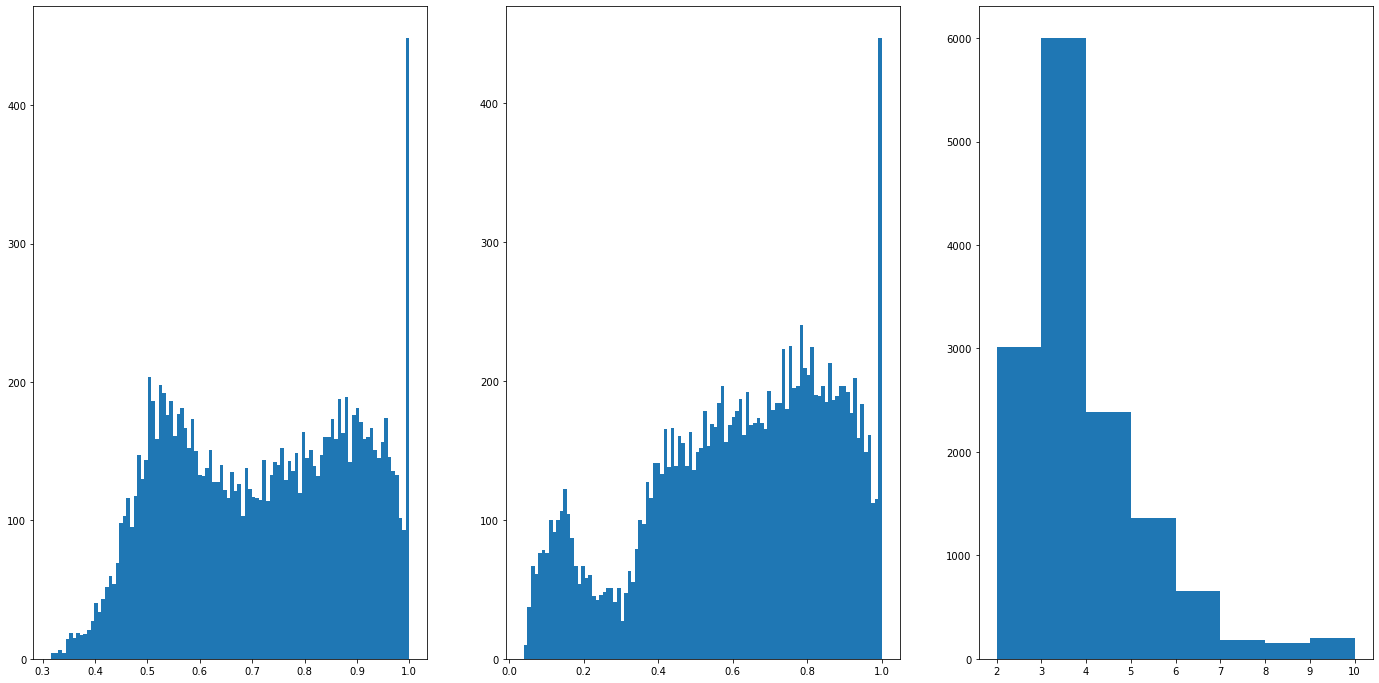

In [60]:
plt.subplot(1, 3, 1)
p1 = plt.hist(df3['last_evaluation'],bins=100)

plt.subplot(1, 3, 2)
p2 = plt.hist(df3['satisfaction'],bins=100)

plt.subplot(1, 3, 3)
p3 = plt.hist(df3['tenure'],bins=8)

**Observations Part 2**


In [24]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14115
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14116 non-null  float64
 1   department         13410 non-null  object 
 2   filed_complaint    2041 non-null   float64
 3   last_evaluation    12629 non-null  float64
 4   n_projects         14116 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14116 non-null  object 
 7   satisfaction       13966 non-null  float64
 8   status             14116 non-null  object 
 9   tenure             13966 non-null  float64
 10  employee_id        14116 non-null  int64  
 11  age                14116 non-null  int64  
 12  gender             14116 non-null  object 
 13  marital_status     14116 non-null  object 
 14  dept_name          13410 non-null  object 
 15  dept_head          13410 non-null  object 
dtypes: float64(6), int64(3

In [21]:
#df3.info()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df3[df3.duplicated(keep = False,subset = ['employee_id'])].sort_values(by=['employee_id']))

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id


In [61]:
df3['last_evaluation'].describe()

count    12629.000000
mean         0.718322
std          0.173069
min          0.316175
25%          0.563680
50%          0.724428
75%          0.871345
max          1.000000
Name: last_evaluation, dtype: float64